In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from config import load_config

CONFIG_PATH = "config.yml"
TRANSFORMS = ["Blur", "Sharpen", "Salt Pepper Noise", "Speckle Noise", "Contrast Inc", "Contrast Dec", "Gamma Inc", "Gamma Dec", "Magnify"]

configs = load_config(CONFIG_PATH)

df = pd.read_csv(configs["plot"]["csv_path"])

INTERVALS = [0, 12.5, 25, 50, 100]*(df.shape[0]//5)
df["Shift Intensity"] = INTERVALS

In [37]:
df.head()

,Transform,K-S signal,K-S pval,K-S acc,Chi-Sq signal,Chi-Sq pval,Chi-Sq acc,Shift Intensity
0,Blur Unchanged,0.0000,1.000000e+00,0,0.0,1.000000e+00,0.0,0.0
1,Blur 12.5%,0.2500,2.196073e-11,1,16.0,6.334248e-05,1.0,12.5
2,Blur 25%,0.4475,1.976612e-36,1,400.0,5.507248e-89,1.0,25.0
3,Blur 50%,0.5625,1.188149e-58,1,NaN,NaN,NaN,50.0
4,Blur 100%,0.6175,1.381386e-71,1,NaN,NaN,NaN,100.0


In [40]:
dataframes = []
# create a separate df for each transform
for transform in TRANSFORMS:
    dataframes.append(df.loc[df["Transform"].str.contains(transform)])
dataframes[0]


,Transform,K-S signal,K-S pval,K-S acc,Chi-Sq signal,Chi-Sq pval,Chi-Sq acc,Shift Intensity
0,Blur Unchanged,0.0000,1.000000e+00,0,0.0,1.000000e+00,0.0,0.0
1,Blur 12.5%,0.2500,2.196073e-11,1,16.0,6.334248e-05,1.0,12.5
2,Blur 25%,0.4475,1.976612e-36,1,400.0,5.507248e-89,1.0,25.0
3,Blur 50%,0.5625,1.188149e-58,1,NaN,NaN,NaN,50.0
4,Blur 100%,0.6175,1.381386e-71,1,NaN,NaN,NaN,100.0


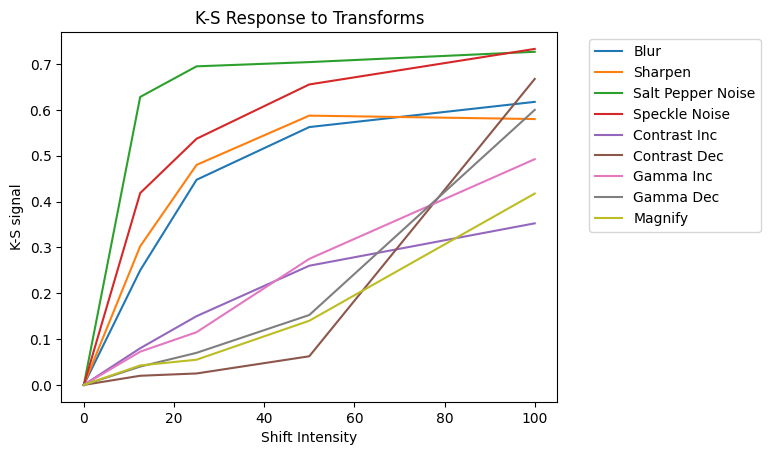

In [75]:
for df_tf in dataframes:
    plt.plot(df_tf["Shift Intensity"], df_tf["K-S signal"])
plt.legend(TRANSFORMS, bbox_to_anchor=(1.05, 1.0), loc="upper left")
plt.title("K-S Response to Transforms")
plt.xlabel("Shift Intensity")
plt.ylabel("K-S signal")
plt.show()

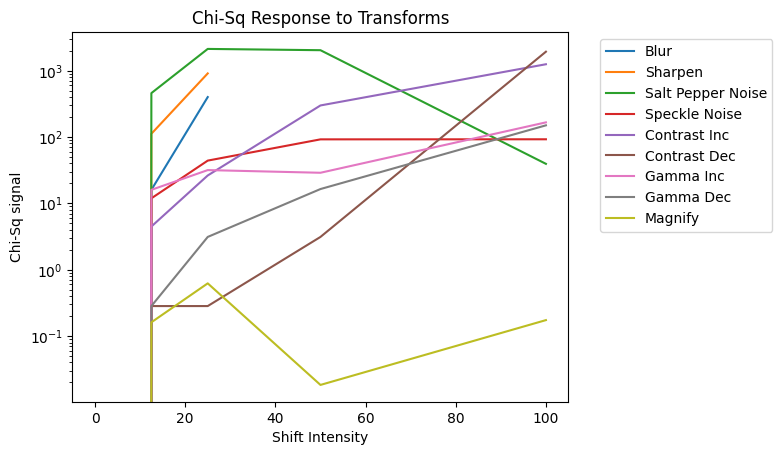

In [77]:
for df_tf in dataframes:
    plt.semilogy(df_tf["Shift Intensity"], df_tf["Chi-Sq signal"])
plt.legend(TRANSFORMS, bbox_to_anchor=(1.05, 1.0), loc="upper left")
plt.title("Chi-Sq Response to Transforms")
plt.xlabel("Shift Intensity")
plt.ylabel("Chi-Sq signal")
plt.show()